In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e10/sample_submission.csv
/kaggle/input/playground-series-s4e10/train.csv
/kaggle/input/playground-series-s4e10/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df_train=pd.read_csv("/kaggle/input/playground-series-s4e10/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s4e10/test.csv")

EDA

In [4]:
print(df_train.head(2),"\n")
print("Shape is",df_train.shape,"\n")
print(df_train.info(),"\n")

   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0                         N                          14            0  
1                         N                           2            0   

Shape is (58645, 13) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age         

In [5]:
print(df_test.head(2))
print("Shape is",df_test.shape,"\n")
print(df_test.info(),"\n")

      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   

       loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0  HOMEIMPROVEMENT          F      25000          15.76                 0.36   
1         PERSONAL          C      10000          12.68                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         N                           2  
1                         Y                           4  
Shape is (39098, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39098 non-null  int64  
 1   person_age                  39098 no

In [6]:
#checking for null values
print("for train dataset \n",df_train.isnull().sum())
print("for test dataset \n",df_test.isnull().sum())

for train dataset 
 id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64
for test dataset 
 id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [7]:
df_train.head(4)

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0


In [8]:
print("The number of unique value in person_home_ownership is",df_train.person_home_ownership.nunique())
print("The number of unique value in loan_intent is",df_train.loan_intent.nunique())
print("The number of unique value in loan_grade is",df_train.loan_grade.nunique())
print("The number of unique value in cb_person_default_on_file is",df_train.cb_person_default_on_file.nunique())


The number of unique value in person_home_ownership is 4
The number of unique value in loan_intent is 6
The number of unique value in loan_grade is 7
The number of unique value in cb_person_default_on_file is 2


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


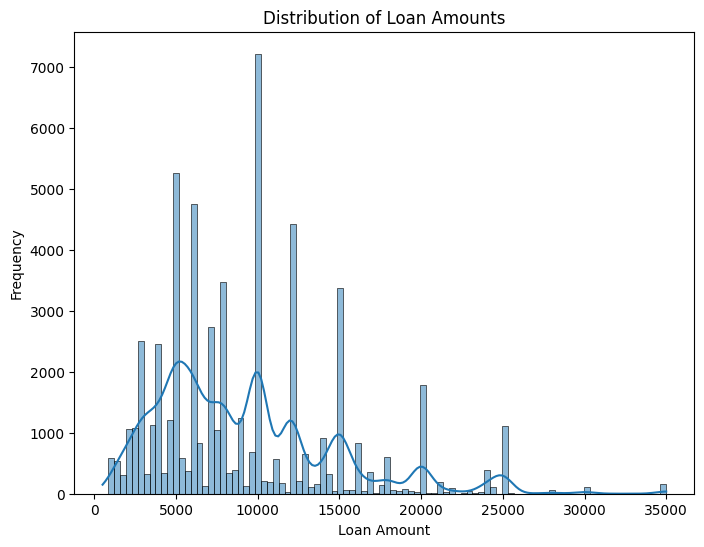

In [9]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='loan_amnt', kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

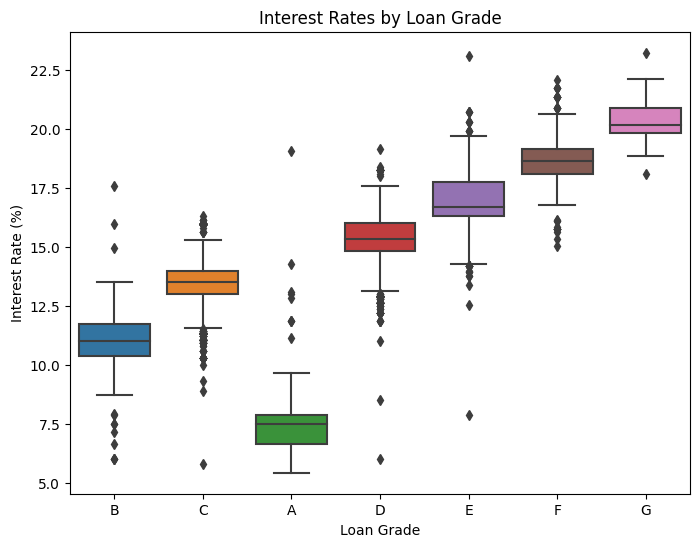

In [10]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_grade', y='loan_int_rate', data=df_train)
plt.title('Interest Rates by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Interest Rate (%)')
plt.show()

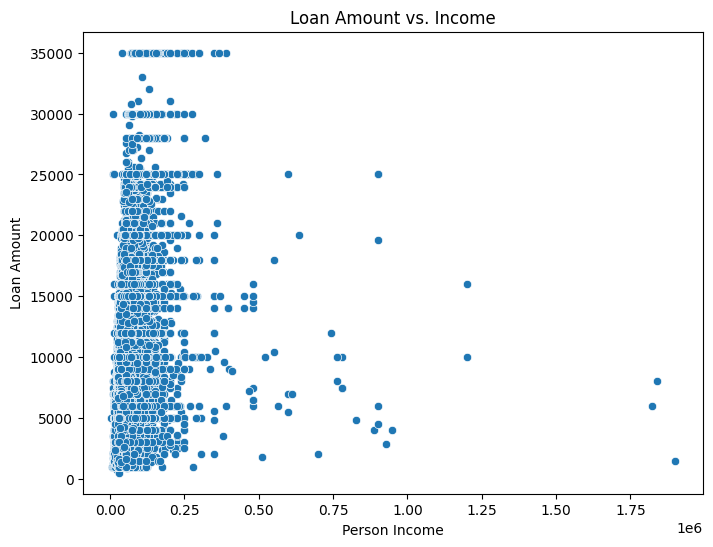

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='person_income', y='loan_amnt', data=df_train)
plt.title('Loan Amount vs. Income')
plt.xlabel('Person Income')
plt.ylabel('Loan Amount')
plt.show()

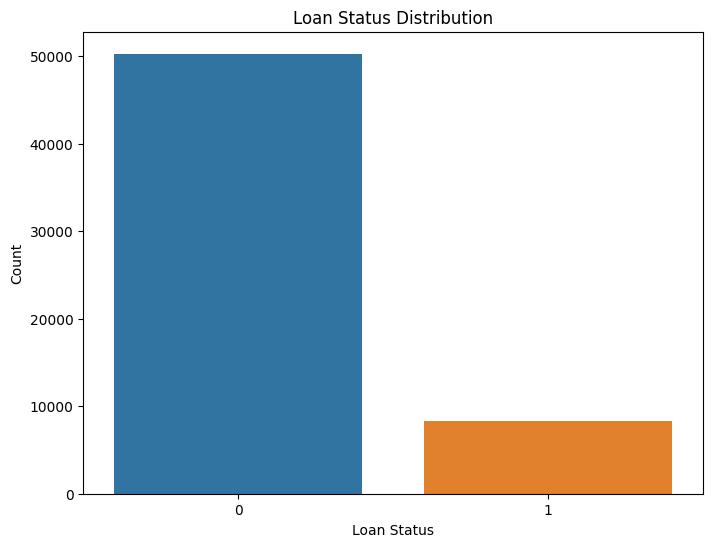

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df_train)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [13]:
#we need to downsample as dataset is imbalanced

In [14]:
minorityclass = df_train.loc[df_train.loan_status==1] 
majorityclass = df_train.loc[df_train.loan_status==0].sample(12000)
df = pd.concat([minorityclass,majorityclass])
df.shape

(20350, 13)

In [15]:
df=df_train

In [16]:
#one hot encoding 
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])
df_encoded.head(4)

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,37,35000,0.0,6000,11.49,0.17,14,0,False,...,False,False,True,False,False,False,False,False,True,False
1,1,22,56000,6.0,4000,13.35,0.07,2,0,False,...,False,False,False,True,False,False,False,False,True,False
2,2,29,28800,8.0,6000,8.90,0.21,10,0,False,...,False,True,False,False,False,False,False,False,True,False
3,3,30,70000,14.0,12000,11.11,0.17,5,0,False,...,True,False,True,False,False,False,False,False,True,False


In [17]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              58645 non-null  int64  
 1   person_age                      58645 non-null  int64  
 2   person_income                   58645 non-null  int64  
 3   person_emp_length               58645 non-null  float64
 4   loan_amnt                       58645 non-null  int64  
 5   loan_int_rate                   58645 non-null  float64
 6   loan_percent_income             58645 non-null  float64
 7   cb_person_cred_hist_length      58645 non-null  int64  
 8   loan_status                     58645 non-null  int64  
 9   person_home_ownership_MORTGAGE  58645 non-null  bool   
 10  person_home_ownership_OTHER     58645 non-null  bool   
 11  person_home_ownership_OWN       58645 non-null  bool   
 12  person_home_ownership_RENT      

In [18]:
columnstochng=["person_home_ownership_MORTGAGE","person_home_ownership_OTHER","person_home_ownership_OWN","person_home_ownership_RENT","loan_intent_DEBTCONSOLIDATION","loan_intent_EDUCATION","loan_intent_HOMEIMPROVEMENT","loan_intent_MEDICAL","loan_intent_PERSONAL","loan_intent_VENTURE","loan_grade_A","loan_grade_B","loan_grade_C","loan_grade_D","loan_grade_E","loan_grade_F","loan_grade_G","cb_person_default_on_file_N","cb_person_default_on_file_Y"]
for i in columnstochng:
    df_encoded[i] = df_encoded[i].astype(int)

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              58645 non-null  int64  
 1   person_age                      58645 non-null  int64  
 2   person_income                   58645 non-null  int64  
 3   person_emp_length               58645 non-null  float64
 4   loan_amnt                       58645 non-null  int64  
 5   loan_int_rate                   58645 non-null  float64
 6   loan_percent_income             58645 non-null  float64
 7   cb_person_cred_hist_length      58645 non-null  int64  
 8   loan_status                     58645 non-null  int64  
 9   person_home_ownership_MORTGAGE  58645 non-null  int64  
 10  person_home_ownership_OTHER     58645 non-null  int64  
 11  person_home_ownership_OWN       58645 non-null  int64  
 12  person_home_ownership_RENT      

In [20]:
#transforming test dataset
df_encoded_test = pd.get_dummies(df_test, columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'])
df_encoded_test.head(4)

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,58645,23,69000,3.0,25000,15.76,0.36,2,False,False,...,False,False,False,False,False,False,True,False,True,False
1,58646,26,96000,6.0,10000,12.68,0.10,4,True,False,...,False,False,False,True,False,False,False,False,False,True
2,58647,26,30000,5.0,4000,17.19,0.13,2,False,False,...,True,False,False,False,False,True,False,False,False,True
3,58648,33,50000,4.0,7000,8.90,0.14,7,False,False,...,False,True,False,False,False,False,False,False,True,False


In [21]:
df_encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39098 non-null  int64  
 1   person_age                      39098 non-null  int64  
 2   person_income                   39098 non-null  int64  
 3   person_emp_length               39098 non-null  float64
 4   loan_amnt                       39098 non-null  int64  
 5   loan_int_rate                   39098 non-null  float64
 6   loan_percent_income             39098 non-null  float64
 7   cb_person_cred_hist_length      39098 non-null  int64  
 8   person_home_ownership_MORTGAGE  39098 non-null  bool   
 9   person_home_ownership_OTHER     39098 non-null  bool   
 10  person_home_ownership_OWN       39098 non-null  bool   
 11  person_home_ownership_RENT      39098 non-null  bool   
 12  loan_intent_DEBTCONSOLIDATION   

In [22]:
columnstochng=["person_home_ownership_MORTGAGE","person_home_ownership_OTHER","person_home_ownership_OWN","person_home_ownership_RENT","loan_intent_DEBTCONSOLIDATION","loan_intent_EDUCATION","loan_intent_HOMEIMPROVEMENT","loan_intent_MEDICAL","loan_intent_PERSONAL","loan_intent_VENTURE","loan_grade_A","loan_grade_B","loan_grade_C","loan_grade_D","loan_grade_E","loan_grade_F","loan_grade_G","cb_person_default_on_file_N","cb_person_default_on_file_Y"]
for i in columnstochng:
    df_encoded_test[i] = df_encoded_test[i].astype(int)

In [23]:
df_encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39098 non-null  int64  
 1   person_age                      39098 non-null  int64  
 2   person_income                   39098 non-null  int64  
 3   person_emp_length               39098 non-null  float64
 4   loan_amnt                       39098 non-null  int64  
 5   loan_int_rate                   39098 non-null  float64
 6   loan_percent_income             39098 non-null  float64
 7   cb_person_cred_hist_length      39098 non-null  int64  
 8   person_home_ownership_MORTGAGE  39098 non-null  int64  
 9   person_home_ownership_OTHER     39098 non-null  int64  
 10  person_home_ownership_OWN       39098 non-null  int64  
 11  person_home_ownership_RENT      39098 non-null  int64  
 12  loan_intent_DEBTCONSOLIDATION   

In [24]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [25]:
df_encoded

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,37,35000,0.0,6000,11.49,0.17,14,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,22,56000,6.0,4000,13.35,0.07,2,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,29,28800,8.0,6000,8.90,0.21,10,0,0,...,0,1,0,0,0,0,0,0,1,0
3,3,30,70000,14.0,12000,11.11,0.17,5,0,0,...,1,0,1,0,0,0,0,0,1,0
4,4,22,60000,2.0,6000,6.92,0.10,3,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,5.0,25000,15.95,0.21,10,0,1,...,0,0,0,0,1,0,0,0,0,1
58641,58641,28,28800,0.0,10000,12.73,0.35,8,1,0,...,0,0,0,1,0,0,0,0,1,0
58642,58642,23,44000,7.0,6800,16.00,0.15,2,1,0,...,0,0,0,0,1,0,0,0,1,0
58643,58643,22,30000,2.0,5000,8.90,0.17,3,0,0,...,0,1,0,0,0,0,0,0,1,0


In [26]:
X=df_encoded.drop(["loan_status"],axis=1)
y=df_encoded["loan_status"]

Model Training

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [28]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import randint, uniform

In [29]:
X_train.shape

(43983, 27)

In [30]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.95


Predictions

In [31]:
y_predprob=model.predict_proba(df_encoded_test)

In [32]:
y_predprob

array([[5.1748753e-04, 9.9948251e-01],
       [9.6866226e-01, 3.1337749e-02],
       [5.8980012e-01, 4.1019991e-01],
       ...,
       [9.8557317e-01, 1.4426813e-02],
       [8.7927747e-01, 1.2072252e-01],
       [3.0812562e-02, 9.6918744e-01]], dtype=float32)

In [33]:
sub=pd.read_csv("/kaggle/input/playground-series-s4e10/sample_submission.csv")
sub.head()

,id,loan_status
0,58645,0.5
1,58646,0.5
2,58647,0.5
3,58648,0.5
4,58649,0.5


In [34]:
sub['loan_status']=y_predprob[:,1]
sub

,id,loan_status
0,58645,0.999483
1,58646,0.031338
2,58647,0.410200
3,58648,0.007414
4,58649,0.034801
...,...,...
39093,97738,0.029461
39094,97739,0.001241
39095,97740,0.014427
39096,97741,0.120723


In [35]:
sub.to_csv("Submissionv.csv",index=False)

In [36]:
"""xgb_param_grid = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
}

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_random_search = RandomizedSearchCV(estimator=xgb_model,
                                       param_distributions=xgb_param_grid,
                                       n_iter=100,
                                       scoring='accuracy',
                                       cv=3,
                                       random_state=42,
                                       n_jobs=-1)

xgb_random_search.fit(X_train, y_train)
print("Best parameters for XGBoost:")
print(xgb_random_search.best_params_)
xgb_best_model = xgb_random_search.best_estimator_
xgb_y_pred = xgb_best_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
"""


'xgb_param_grid = {\n    \'n_estimators\': randint(50, 300),\n    \'max_depth\': randint(3, 15),\n    \'learning_rate\': uniform(0.01, 0.3),\n    \'subsample\': uniform(0.5, 0.5),\n}\n\nxgb_model = XGBClassifier(use_label_encoder=False, eval_metric=\'logloss\')\n\nxgb_random_search = RandomizedSearchCV(estimator=xgb_model,\n                                       param_distributions=xgb_param_grid,\n                                       n_iter=100,\n                                       scoring=\'accuracy\',\n                                       cv=3,\n                                       random_state=42,\n                                       n_jobs=-1)\n\nxgb_random_search.fit(X_train, y_train)\nprint("Best parameters for XGBoost:")\nprint(xgb_random_search.best_params_)\nxgb_best_model = xgb_random_search.best_estimator_\nxgb_y_pred = xgb_best_model.predict(X_test)\nxgb_accuracy = accuracy_score(y_test, xgb_y_pred)\nprint(f"XGBoost Accuracy: {xgb_accuracy:.2f}")\n'

In [37]:
"""from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")"""

'from sklearn.ensemble import RandomForestClassifier\nrf_model = RandomForestClassifier(n_estimators=100, random_state=42)\nrf_model.fit(X_train, y_train)\ny_pred = rf_model.predict(X_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f"Accuracy: {accuracy:.2f}")'

In [38]:
"""rf_param_grid = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2']
}

rf_model = RandomForestClassifier(random_state=42,verbose=1)

rf_random_search = RandomizedSearchCV(estimator=rf_model,
                                       param_distributions=rf_param_grid,
                                       n_iter=100,
                                       scoring='accuracy',
                                       cv=3,
                                       random_state=42,
                                       n_jobs=-1)

rf_random_search.fit(X_train, y_train)
print("\nBest parameters for Random Forest:")
print(rf_random_search.best_params_)
rf_best_model = rf_random_search.best_estimator_
rf_y_pred = rf_best_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")"""

'rf_param_grid = {\n    \'n_estimators\': randint(50, 300),\n    \'max_depth\': randint(3, 15),\n    \'min_samples_split\': randint(2, 10),\n    \'min_samples_leaf\': randint(1, 10),\n    \'max_features\': [\'sqrt\', \'log2\']\n}\n\nrf_model = RandomForestClassifier(random_state=42,verbose=1)\n\nrf_random_search = RandomizedSearchCV(estimator=rf_model,\n                                       param_distributions=rf_param_grid,\n                                       n_iter=100,\n                                       scoring=\'accuracy\',\n                                       cv=3,\n                                       random_state=42,\n                                       n_jobs=-1)\n\nrf_random_search.fit(X_train, y_train)\nprint("\nBest parameters for Random Forest:")\nprint(rf_random_search.best_params_)\nrf_best_model = rf_random_search.best_estimator_\nrf_y_pred = rf_best_model.predict(X_test)\nrf_accuracy = accuracy_score(y_test, rf_y_pred)\nprint(f"Random Forest Accuracy: 